In [1]:
import pandas as pd
import numpy as np
from ast import literal_eval

In [2]:
df = pd.read_csv("../csv/2019_crossref_pubmed_upw.csv", index_col = 0)
df.head()

,pmid,doi,affiliations,abstract,date_published,author_list,journal title,article title,num_citations_crossref,num_references_crossref,date_published_upw,is_oa,oa_status,oa_locations,genre
0,30872305,10.7861/clinmedicine.19-2-169,['Walton Centre NHS Foundation Trust'],Neuromyelitis optica spectrum disorder (NMOSD)...,"[2019, 3]","['Huda, Saif', 'Whittam, Dan', 'Bhojak, Manees...",Clinical Medicine,Neuromyelitis optica spectrum disorders,84.0,60.0,2019-03-01,True,gold,"[{'updated': '2020-11-23T10:26:42.514123', 'ur...",journal-article
1,30609105,10.1111/ced.13891,['Sheffield Teaching Hospitals NHS Foundation ...,Erythromelalgia is a condition characterized b...,"[2019, 1, 4]","['Mann, N.', 'King, T.', 'Murphy, R.']",Clinical and Experimental Dermatology,Review of primary and secondary erythromelalgia,24.0,29.0,2019-01-04,True,bronze,"[{'updated': '2021-09-15T06:51:20.019047', 'ur...",journal-article
3,30525757,10.21037/cco.2018.11.03,"['University Hospital Birmingham', 'University...",Mycosis fungoides (MF) represents the majority...,"[2019, 3]","['Das, Suparna', 'Mitchell, Patrick', 'Ross, N...",World Neurosurgery,Decompressive Hemicraniectomy in the Treatment...,28.0,40.0,2019-03-01,False,closed,[],journal-article
4,30500591,10.1016/j.wneu.2018.11.176,['Derriford Hospital'],BACKGROUND: Malignant middle cerebral artery i...,"[2019, 1, 18]","['Ahmad, Gaity', 'Baker, Jade', 'Finnerty, Joh...",Cochrane Database of Systematic Reviews,Laparoscopic entry techniques,20.0,125.0,2019-01-18,True,green,"[{'updated': None, 'url': 'https://europepmc.o...",journal-article
5,30657163,10.1002/14651858.CD006583.pub5,['Pennine Acute Hospitals NHS Trust'],Update of Cochrane Database Syst Rev. 2015 ...,"[2018, 9, 21]","['Al-Lamee, Rasha K', 'Nowbar, Alexandra N', '...",Heart,Percutaneous coronary intervention for stable ...,19.0,48.0,2018-09-21,False,closed,[],journal-article


In [3]:
df["genre"].value_counts()

journal-article        24565
book-chapter              55
proceedings-article        1
Name: genre, dtype: int64

In [4]:
df.isna().sum()

pmid                          0
doi                           0
affiliations                  0
abstract                   2784
date_published              311
author_list                 154
journal title               311
article title               311
num_citations_crossref      311
num_references_crossref     311
date_published_upw          288
is_oa                       288
oa_status                   288
oa_locations                288
genre                       288
dtype: int64

In [5]:
df.abstract.fillna(df['article title'], inplace=True)
df.isna().sum()

pmid                         0
doi                          0
affiliations                 0
abstract                    25
date_published             311
author_list                154
journal title              311
article title              311
num_citations_crossref     311
num_references_crossref    311
date_published_upw         288
is_oa                      288
oa_status                  288
oa_locations               288
genre                      288
dtype: int64

In [6]:
df.dropna(inplace=True)
df.isna().sum()

pmid                       0
doi                        0
affiliations               0
abstract                   0
date_published             0
author_list                0
journal title              0
article title              0
num_citations_crossref     0
num_references_crossref    0
date_published_upw         0
is_oa                      0
oa_status                  0
oa_locations               0
genre                      0
dtype: int64

In [7]:
df["pub_date"] = pd.to_datetime(df['date_published_upw'])
df.pub_date

0       2019-03-01
1       2019-01-04
3       2019-03-01
4       2019-01-18
5       2018-09-21
           ...    
24897   2019-11-01
24898   2019-07-15
24899   2019-07-31
24900   2020-02-01
24901   2019-12-01
Name: pub_date, Length: 24469, dtype: datetime64[ns]

In [8]:
df["is_oa"].value_counts()

True     17399
False     7070
Name: is_oa, dtype: int64

In [9]:
df["oa_status"].value_counts()

closed    7070
gold      5350
green     5042
hybrid    3575
bronze    3432
Name: oa_status, dtype: int64

In [10]:
df['author_list'] = df["author_list"].apply(literal_eval)
df.author_list.iloc[0]

['Huda, Saif',
 'Whittam, Dan',
 'Bhojak, Maneesh',
 'Chamberlain, Jayne',
 'Noonan, Carmel',
 'Jacob, Anu',
 'Kneen, Rachel']

In [11]:
df["num_authors"] = df['author_list'].apply(lambda x: len(list(x)))
df.num_authors.value_counts()

4      2995
3      2896
5      2477
2      2233
6      2105
       ... 
293       1
207       1
153       1
75        1
436       1
Name: num_authors, Length: 193, dtype: int64

In [12]:
df.head()

,pmid,doi,affiliations,abstract,date_published,author_list,journal title,article title,num_citations_crossref,num_references_crossref,date_published_upw,is_oa,oa_status,oa_locations,genre,pub_date,num_authors
0,30872305,10.7861/clinmedicine.19-2-169,['Walton Centre NHS Foundation Trust'],Neuromyelitis optica spectrum disorder (NMOSD)...,"[2019, 3]","[Huda, Saif, Whittam, Dan, Bhojak, Maneesh, Ch...",Clinical Medicine,Neuromyelitis optica spectrum disorders,84.0,60.0,2019-03-01,True,gold,"[{'updated': '2020-11-23T10:26:42.514123', 'ur...",journal-article,2019-03-01,7
1,30609105,10.1111/ced.13891,['Sheffield Teaching Hospitals NHS Foundation ...,Erythromelalgia is a condition characterized b...,"[2019, 1, 4]","[Mann, N., King, T., Murphy, R.]",Clinical and Experimental Dermatology,Review of primary and secondary erythromelalgia,24.0,29.0,2019-01-04,True,bronze,"[{'updated': '2021-09-15T06:51:20.019047', 'ur...",journal-article,2019-01-04,3
3,30525757,10.21037/cco.2018.11.03,"['University Hospital Birmingham', 'University...",Mycosis fungoides (MF) represents the majority...,"[2019, 3]","[Das, Suparna, Mitchell, Patrick, Ross, Nichol...",World Neurosurgery,Decompressive Hemicraniectomy in the Treatment...,28.0,40.0,2019-03-01,False,closed,[],journal-article,2019-03-01,4
4,30500591,10.1016/j.wneu.2018.11.176,['Derriford Hospital'],BACKGROUND: Malignant middle cerebral artery i...,"[2019, 1, 18]","[Ahmad, Gaity, Baker, Jade, Finnerty, John, Ph...",Cochrane Database of Systematic Reviews,Laparoscopic entry techniques,20.0,125.0,2019-01-18,True,green,"[{'updated': None, 'url': 'https://europepmc.o...",journal-article,2019-01-18,5
5,30657163,10.1002/14651858.CD006583.pub5,['Pennine Acute Hospitals NHS Trust'],Update of Cochrane Database Syst Rev. 2015 ...,"[2018, 9, 21]","[Al-Lamee, Rasha K, Nowbar, Alexandra N, Franc...",Heart,Percutaneous coronary intervention for stable ...,19.0,48.0,2018-09-21,False,closed,[],journal-article,2018-09-21,3


# TO DO: BASIC DATA VISUALISATION OF DATA SET

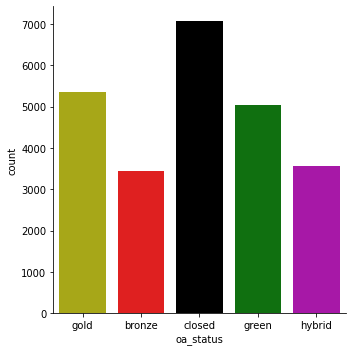

In [20]:
import seaborn as sns
oa_palette = {"gold": "y", "bronze": "r", "closed": "k", "green": "g", "hybrid": "m"}

sns.catplot(x="oa_status", kind="count", data=df, palette = oa_palette)

In [14]:
df.num_authors.value_counts().sort_values()

436       1
165       1
221       1
135       1
132       1
       ... 
6      2105
2      2233
5      2477
3      2896
4      2995
Name: num_authors, Length: 193, dtype: int64

In [15]:
# correlate number of citations to the open access status

<AxesSubplot:xlabel='oa_status', ylabel='num_citations_crossref'>

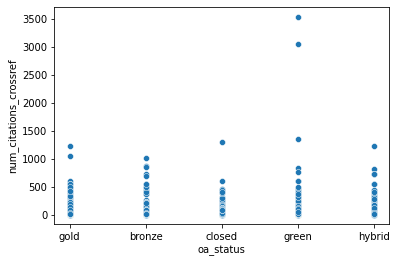

In [24]:
sns.scatterplot(data=df, x="oa_status", y="num_citations_crossref")

# TO DO: TOPIC ANALYSIS OF PAPERS 

In [16]:
# Use LDA?